<a href="https://colab.research.google.com/github/Bimalkanta/1-bikes-demand-prediction/blob/main/Project_Fruits_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Download and unzip the dataset
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
!unzip fruits.zip

--2023-08-21 10:56:28--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  55.9MB/s    in 1.8s    

2023-08-21 10:56:32 (55.9 MB/s) - ‘fruits.zip’ saved [105946856/105946856]

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating:

In [3]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt


In [4]:
# Load the training, validation, and test datasets using image_dataset_from_directory
train_dataset = tf.keras.utils.image_dataset_from_directory("fruits/train", image_size=(32, 32), batch_size=20)
validation_dataset = tf.keras.utils.image_dataset_from_directory("fruits/validation", image_size=(32, 32), batch_size=20)
test_dataset = tf.keras.utils.image_dataset_from_directory("fruits/test", image_size=(32, 32), batch_size=20)


Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


In [5]:
# Define fruit classes
fruit_classes = ["apple", "banana", "orange"]

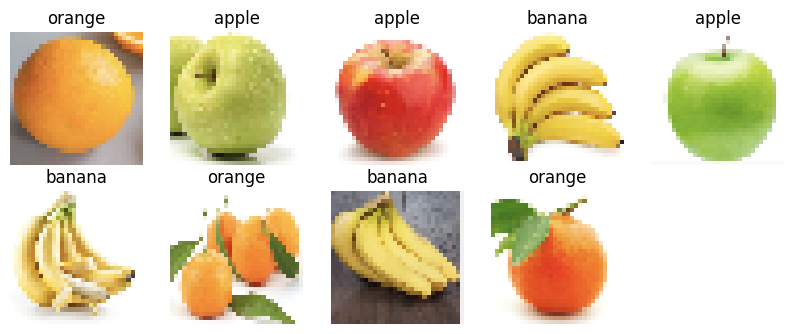

In [6]:
# Display some sample images from the training dataset
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(5, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(fruit_classes[labels[i]])
        plt.axis("off")

In [7]:
# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(3)  # Output layer with 3 classes
])

In [8]:
# Compile the model
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [9]:
# Train the model
model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)


Epoch 1/10
23/23 [==============================] - 5s 115ms/step - loss: 0.9777 - accuracy: 0.5348 - val_loss: 0.7616 - val_accuracy: 0.7121
Epoch 2/10
23/23 [==============================] - 3s 80ms/step - loss: 0.5273 - accuracy: 0.7783 - val_loss: 0.4049 - val_accuracy: 0.8333
Epoch 3/10
23/23 [==============================] - 2s 75ms/step - loss: 0.3782 - accuracy: 0.8435 - val_loss: 0.2860 - val_accuracy: 0.8939
Epoch 4/10
23/23 [==============================] - 2s 75ms/step - loss: 0.2725 - accuracy: 0.9022 - val_loss: 0.3370 - val_accuracy: 0.8636
Epoch 5/10
23/23 [==============================] - 2s 73ms/step - loss: 0.1548 - accuracy: 0.9609 - val_loss: 0.2678 - val_accuracy: 0.8788
Epoch 6/10
23/23 [==============================] - 3s 114ms/step - loss: 0.1240 - accuracy: 0.9565 - val_loss: 0.1734 - val_accuracy: 0.9394
Epoch 7/10
23/23 [==============================] - 2s 75ms/step - loss: 0.0904 - accuracy: 0.9739 - val_loss: 0.2497 - val_accuracy: 0.8788
Epoch 8/10


In [10]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

7/7 [==============================] - 1s 11ms/step - loss: 0.3007 - accuracy: 0.9154
Test loss: 0.30070364475250244
Test accuracy: 0.9153845906257629


In [11]:
# Save the trained model as a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("model.tflite", 'wb') as f:
    f.write(tflite_model)